In [11]:
from calendar import month

import pandas as pd
monthly = pd.read_csv('housing_in_london_monthly_variables.csv')

In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### goal is to produce average price by region for all relevant data

In [12]:
monthly

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [13]:
monthly['area_code'] = monthly['code'].str[:3]

In [14]:
monthly

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,area_code
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,E09
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1,E09
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1,E09
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1,E09
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1,E09
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0,E92
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0,E92
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0,E92
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0,E92


In [5]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [20]:
unique_combinations = monthly[['area', 'area_code']].drop_duplicates()

In [21]:
unique_combinations

,area,area_code
0,city of london,E09
301,barking and dagenham,E09
602,barnet,E09
903,bexley,E09
1204,brent,E09
1505,bromley,E09
1806,camden,E09
2107,croydon,E09
2408,ealing,E09
2709,enfield,E09


In [25]:
monthly = monthly[monthly['borough_flag']!= 1]
areas_to_include = ['E12']
monthly = monthly[monthly['area_code'].isin(areas_to_include)]

In [26]:
monthly

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,area_code
3356,1998-04-01,south east,83176,E12000008,15354.0,NaN,0,E12
10540,1995-01-01,north east,42076,E12000001,1983.0,NaN,0,E12
10541,1995-02-01,north east,42572,E12000001,1986.0,NaN,0,E12
10542,1995-03-01,north east,42370,E12000001,3052.0,NaN,0,E12
10543,1995-04-01,north east,42096,E12000001,2406.0,NaN,0,E12
10544,1995-05-01,north east,43266,E12000001,2857.0,NaN,0,E12
10545,1995-06-01,north east,42315,E12000001,3251.0,NaN,0,E12
10546,1995-07-01,north east,43288,E12000001,2719.0,NaN,0,E12
10547,1995-08-01,north east,41899,E12000001,2969.0,NaN,0,E12
10548,1995-09-01,north east,41851,E12000001,2983.0,NaN,0,E12


In [27]:
areas = monthly.groupby('area')['average_price'].mean()

In [28]:
areas

area
east midlands           121649.890365
east of england         171182.229236
london                  265517.425249
north east               97041.076412
north west              108789.574751
south east              196442.129568
south west              163353.252492
west midlands           127102.840532
yorks and the humber    109112.677741
Name: average_price, dtype: float64

<Axes: xlabel='area'>

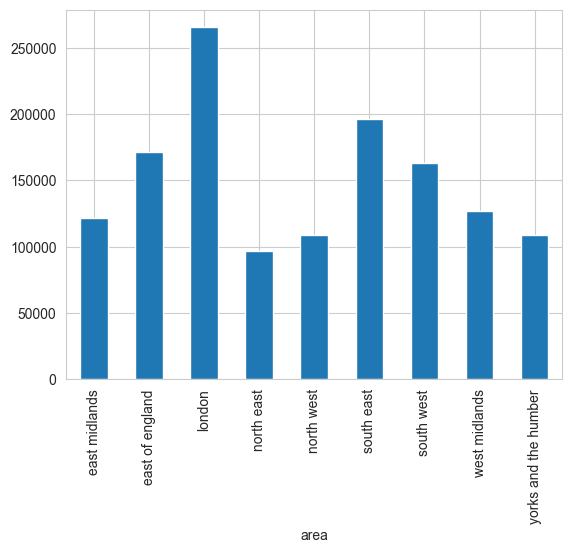

In [29]:
areas.plot(kind='bar')